In [1]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib as plt
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# 1. Data Preprocessing

In [2]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('clmentbisaillon/fake-and-real-news-dataset', path='data/', unzip=True)

In [3]:
# Read in data
df_fake = pd.read_csv('data/Fake.csv')
df_true = pd.read_csv('data/True.csv')

# 0 if the article is true, 1 if the article is fake
df_true['isFake'] = [0] * len(df_true)
df_fake['isFake'] = [1] * len(df_fake)

df = pd.concat([df_true, df_fake])
df.head()

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


# 2. Data Analysis

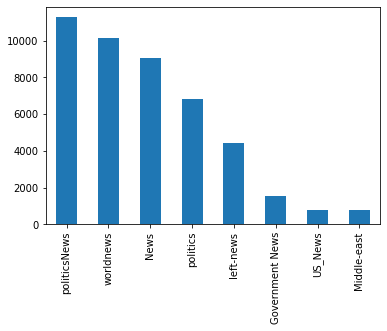

In [4]:
df.subject.value_counts().plot.bar()

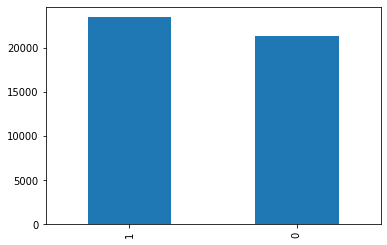

In [5]:
df.isFake.value_counts().plot.bar()

# 3. Feature Selection

In [6]:
y = df.isFake
X = df.drop(['isFake', 'date'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True)

#  4. Modeling

In [8]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [9]:
text_clf.fit(X_train.text, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [10]:
# Save model
dump(text_clf, 'models/nb_model.joblib')

['models/nb_model.joblib']

# 5. Evaluation 

In [11]:
loaded_text_clf = load('models/nb_model.joblib') 
predicted = loaded_text_clf.predict(X_test.text)

In [12]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6474
           1       0.93      0.95      0.94      6996

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



In [13]:
metrics.confusion_matrix(y_test, predicted)

array([[5986,  488],
       [ 369, 6627]])